In [1]:
import topojson
import geopandas as gpd
import numpy as np
from simplification.cutil import simplify_coords, simplify_coords_vw, simplify_coords_vwp
from shapely import geometry
import copy
%matplotlib inline
gdf = gpd.read_file('https://www.jasondavies.com/simplify/norway.json')
dd = topojson.core.dedup.Dedup(gdf)

In [2]:
dd_dict = copy.deepcopy(dd.to_dict())
ls = dd_dict['linestrings']
sel_ls = ls[1:10]

In [3]:
def simp_geom(epsilon):
    deep_ls = copy.deepcopy(sel_ls)
    for ls in deep_ls:
        ls.coords = simplify_coords_vwp(np.array(ls), epsilon)  
    return geometry.GeometryCollection(deep_ls)

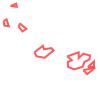

In [4]:
simp_geom(0.0002)

In [5]:
import panel as pn
pn.extension()
eps = pn.widgets.FloatSlider(name='Epsilon', start=0.0001, end=0.0005, step=0.00001, value=0.0001)
pn.interact(simp_geom, epsilon=eps)

Column
    [0] Column
        [0] FloatSlider(end=0.0005, name='Epsilon', start=0.0001, step=1e-05, value=0.0001)
    [1] Row
        [0] SVG(GeometryCollection, name='interactive00007')